In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from matplotlib.ticker import EngFormatter

from matplotlib.animation import FuncAnimation

In [2]:
DAC = np.arange(250, 19, -1) / 1.31
INTENSITIES = np.arange(11, 50, 6)
STR_INTENSITIES = ["%d kV"%i for i in INTENSITIES]

In [3]:
def getData(directory):
    data = []
    folders = sorted(glob(directory))
    for folder in folders:
        files = glob(folder + "/*.txt")
        temp = np.array([np.genfromtxt(file) for file in files])
        data.append(temp)
    return np.array(data)

In [4]:
tungsteno = getData("1. Tungsteno/*")
plata = getData("2. Plata/*")

In [5]:
plata[1, 0] = plata[1, -1]
plata[1, 1] = plata[1, -1]
plata[1, 2] = plata[1, -1]
plata[1, 3] = plata[1, -1]

In [6]:
mean_tungsteno = tungsteno.mean(axis = 1)
mean_plata = plata.mean(axis = 1)

int_tungsteno = np.trapz(tungsteno, axis = 2)[:, :, np.newaxis]
std_tungsteno = (tungsteno / int_tungsteno).std(axis = 1)

int_plata = np.trapz(plata, axis = 2)[:, :, np.newaxis]
std_plata = (plata / int_plata).std(axis = 1)


std_tungsteno[:, :20] = 0
std_plata[:, :2] = 0

filtered_tungsteno = medfilt(mean_tungsteno, [1, 3])
filtered_plata = medfilt(mean_plata, [1, 3])

normed_tungsteno = filtered_tungsteno / np.trapz(filtered_tungsteno)[:, np.newaxis]
normed_plata = filtered_plata / np.trapz(filtered_plata)[:, np.newaxis]

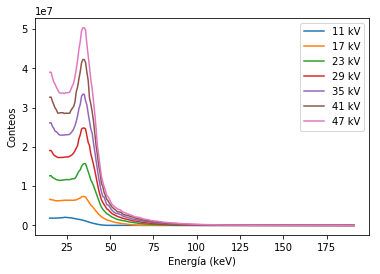

In [7]:
for i in range(filtered_tungsteno.shape[0]):
    plt.plot(DAC, filtered_tungsteno[i], label = STR_INTENSITIES[i])

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Tungsteno_Means.pdf")
plt.show()

In [8]:
# fig, ax = plt.subplots()

# n = 4
# plots = [plt.plot([], [], label = label)[0] for label in STR_INTENSITIES]

# ax.set_xlim(DAC.min(), DAC.max())
# ax.set_ylim(-normed_tungsteno.max() * 0.1, normed_tungsteno.max() * 1.1)
# def animate(i):
#     l = n*i // 231
#     c = n*i % 231
#     plots[l].set_data(DAC[:c], normed_tungsteno[l, :c])
#     return tuple(plots)

# plt.xlabel("DAC")
# plt.ylabel("Conteos")
# plt.legend()

# ani = FuncAnimation(fig, animate, frames = np.multiply(*normed_tungsteno.shape) // n, interval = 25)
# ani.save("Tungsteno_Norms.gif", writer = "imagemagick")
# plt.show()

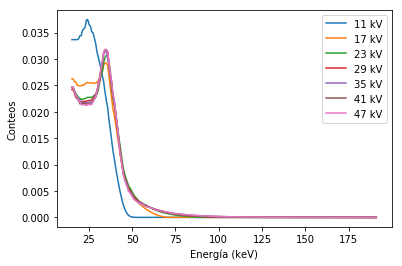

In [9]:
for i in range(normed_tungsteno.shape[0]):
    plt.plot(DAC, normed_tungsteno[i], label = STR_INTENSITIES[i])

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Tungsteno_Normed.pdf")
plt.show()

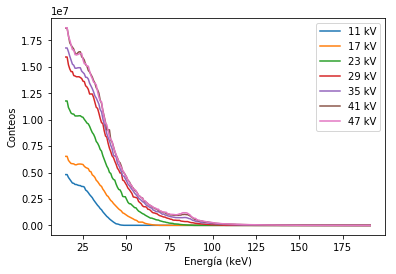

In [10]:
for i in range(filtered_plata.shape[0]):
    plt.plot(DAC, filtered_plata[i], label = STR_INTENSITIES[i])

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Plata_Means.pdf")
plt.show()

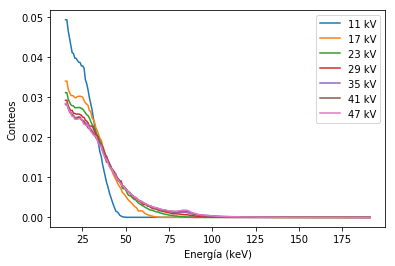

In [11]:
for i in range(normed_plata.shape[0]):
    plt.plot(DAC, normed_plata[i], label = STR_INTENSITIES[i])

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Plata_Normed.pdf")
plt.show()

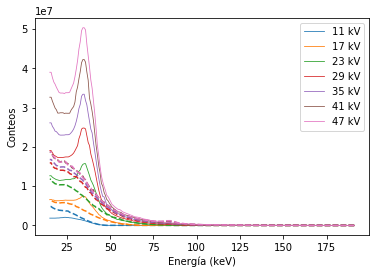

In [12]:
# fig = plt.figure(figsize = (8, 4.5))
for i in range(filtered_tungsteno.shape[0]):
    c = plt.plot(DAC, filtered_tungsteno[i], label = STR_INTENSITIES[i], lw = 0.8)[0].get_color()
    try: plt.plot(DAC, filtered_plata[i], "--", c = c)
    except: pass

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos")
plt.legend()

plt.savefig("Both_Means.pdf")
plt.show()

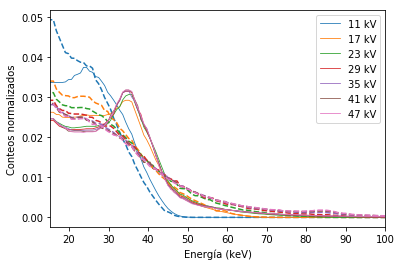

In [13]:
# fig = plt.figure(figsize = (8, 4.5))
for i in range(normed_tungsteno.shape[0]):
    c = plt.plot(DAC, normed_tungsteno[i], label = STR_INTENSITIES[i], lw = 0.8)[0].get_color()
    try: plt.plot(DAC, normed_plata[i], "--", c = c)
    except: pass

plt.xlabel("Energía (keV)")
plt.ylabel("Conteos normalizados")
plt.legend()

plt.xlim(DAC.min(), 100)

plt.savefig("Both_Normed.pdf")
plt.show()

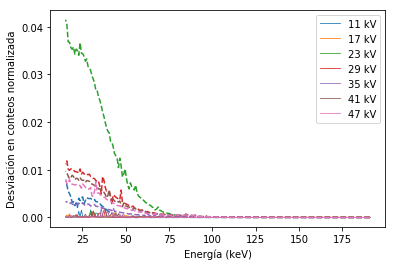

In [14]:
# fig = plt.figure(figsize = (8, 4.5))

for i in range(normed_tungsteno.shape[0]):
    c = plt.plot(DAC, std_tungsteno[i], label = STR_INTENSITIES[i], lw = 0.8)[0].get_color()
    try: plt.plot(DAC, std_plata[i], "--", c = c)
    except: pass

plt.xlabel("Energía (keV)")
plt.ylabel("Desviación en conteos normalizada")
plt.legend()

plt.savefig("Both_std.pdf")
plt.show()

In [15]:
def getRegresion(pos, maxs, stds):
    pos = pos.argmax(axis = 1)
    maxs = np.array([maxs[i, pos[i]] for i in range(len(pos))])
    stds = np.array([stds[i, pos[i]] for i in range(len(pos))])
    error = stds * maxs
    error = stds * maxs

    (m, b), cov = np.polyfit(INTENSITIES, maxs, 1, cov = True)
    dm = cov[0, 0]**0.5
    db = cov[1, 1]**0.5

    y = m * INTENSITIES + b

    print(m, dm)
    print(b, db)
    
    return maxs, y, error


1382617.5000000002 46036.8248177466
-14963590.357142862 1444852.3802487196
422018.5714285716 75922.94242400635
1065512.8571428542 2382819.5039751115


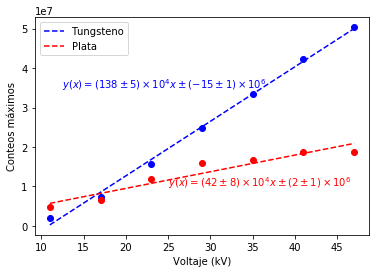

In [16]:
# fig = plt.figure(figsize = (8, 4.5))

maxs, y, error = getRegresion(filtered_tungsteno, filtered_tungsteno, std_tungsteno)
plt.errorbar(INTENSITIES, maxs, yerr = error, color = "b", fmt='o', ecolor='g', capthick = 2)
plt.plot(INTENSITIES, y, "--", color = "b", label = "Tungsteno")

maxs, y, error = getRegresion(filtered_plata, filtered_plata, std_plata)

plt.errorbar(INTENSITIES, maxs, yerr = error, color = "r", fmt='o', ecolor='g', capthick = 2)
plt.plot(INTENSITIES, y, "--", color = "r", label = "Plata")

plt.text(12.5, 3.5e7, r"$y(x) = (138 \pm 5)\times 10^4 x \pm (-15 \pm 1)\times 10^6$", color = "b")
plt.text(25, 1e7, r"$y(x) = (42 \pm 8)\times 10^4 x \pm (2 \pm 1)\times 10^6$", color = "r")
plt.ylabel("Conteos máximos")
plt.xlabel("Voltaje (kV)")

plt.legend()

plt.savefig("Max_voltage.pdf")
plt.show()

# Energias

In [17]:
CuI = np.genfromtxt("3. Calibracion en Energia/Cu.txt")
RhI = np.genfromtxt("3. Calibracion en Energia/Rh.txt")

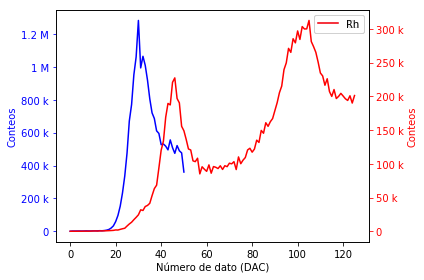

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(CuI, color = "b", label = "Cu")
ax1.set_xlabel('Número de dato (DAC)')
ax1.set_ylabel('Conteos', color = "b")
ax1.tick_params('y', colors = "b")

ax2 = ax1.twinx()
ax2.plot(RhI, color = "r", label = 'Rh')
ax2.set_ylabel('Conteos', color='r')
ax2.tick_params('y', colors='r')

ax1.yaxis.set_major_formatter(EngFormatter(unit=''))
ax2.yaxis.set_major_formatter(EngFormatter(unit=''))

fig.tight_layout()

ax1.legend()
ax2.legend()


fig.savefig("CalibracionE.pdf")
plt.show()